======================== Import Packages ===========================

In [5]:
import sys, os, pdb, glob
import numpy as np
from astropy.io import ascii
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

========================== Define Fuctions =========================

In [6]:
def plot_twosample(file, ax, color, region, xpos, ypos):

    """
    PURPOSE:    Plot the results of the two-sample tests
                Ouput from calc_twosample_test.py

    INPUT:      file = file name of two-sample test results (str)
                ax = plot axis (matplotlib ax)
                color = color for plotting this region (str)
                region = region name (str)
                xpos = x position to plot region name (float)
                ypos = y position to plot region name (float)

    OUTPUT:     Updated plot axis (matplotlib ax)
                Prints median probability to terminal
    
    """

    ### PLOT REGIONS NAME
    plt.text(xpos, ypos, region, size=15, color=color, alpha=0.8)

    ### PLOT TWO-SAMPLE RESULTS
    t = ascii.read(file)
    xv = np.sort(t['col1'])
    yv = np.arange(len(xv)) / float(len(xv))
    ax.plot(xv, yv, color=color, linewidth=5, alpha=0.5)

    ### PRINT MEDIAN PROBABILITY
    ind = np.where(yv == 0.5)

    print(" \tMedian p_phi for " + region + " = " + str(xv[ind][0]))

    return ax

============================== Code ================================

 	Median p_phi for Upper Sco = 9.466132e-07
 	Median p_phi for Taurus = 0.7125768


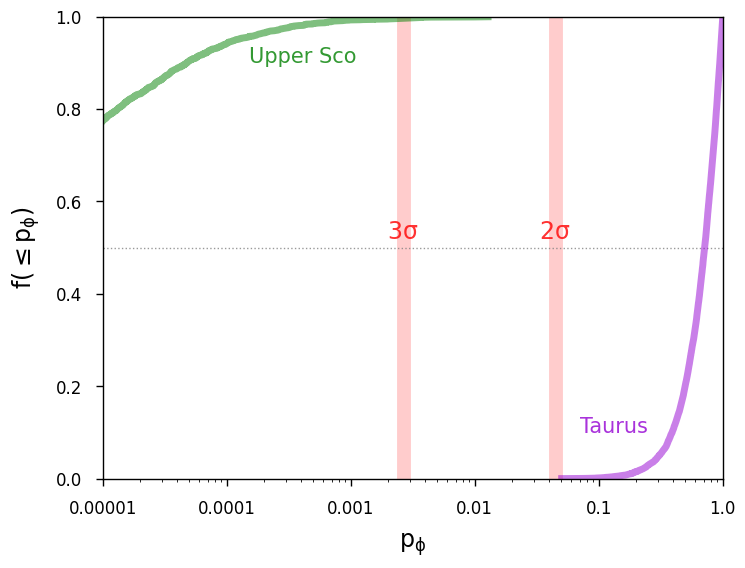

In [7]:
### SETUP PLOT
mpl.rc('xtick', labelsize=12) 
mpl.rc('ytick', labelsize=12)
mpl.rc('xtick.major', size=5, pad=10, width=1)
mpl.rc('ytick.major', size=5, pad=10, width=1)
mpl.rc('axes', linewidth=1)
mpl.rc('lines', markersize=5)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.set_ylabel(r'$\mathregular{f(\leq p_{\phi})}$', fontsize=17, labelpad=10)
ax.set_xlabel(r'$\mathregular{p_{\phi}}$', fontsize=17, labelpad=10)
ax.set_xlim([1e-5, 1])
ax.set_ylim([0, 1])
ax.set_xscale('log')
fig.canvas.draw()
ax.xaxis.set_major_locator(mtick.FixedLocator((ax.get_xticks()/10).tolist()[1:]))
labels = list(['', '0.00001', '0.0001', '0.001', '0.01', '0.1', '1.0'])
ax.set_xticklabels(labels, size=12)

### PLOT SIGMA LIMITS
plt.axvline(x=0.0455, color='red', linestyle='-', linewidth=10, alpha=0.2)
plt.text(0.033, 0.52, r'$\mathregular{2\sigma}$', size=17, color='red', alpha=0.8)
plt.axvline(x=0.0027, color='red', linestyle='-', linewidth=10, alpha=0.2)
plt.text(0.00195, 0.52, r'$\mathregular{3\sigma}$', size=17, color='red', alpha=0.8)
plt.axhline(y=0.5, color='gray', linestyle=':', linewidth=1, alpha=0.8)

### PLOT TWO-SAMPLE TEST RESULTS
### OUTPUT FROM calc_twosample.py)
ax = plot_twosample('../output/twosample_test_usc.txt', ax, 'green', 'Upper Sco', 0.00015, 0.9)
ax = plot_twosample('../output/twosample_test_tau.txt', ax, 'darkviolet', 'Taurus', 0.07, 0.1)

### SAVE FIGURE
fig.savefig('../output/figure_09.png', bbox_inches='tight', dpi=100)

In [8]:
plt.close('all')